# Using Voila and IPython widgets

By using Voila with Juyper-flex, you can create dashboards that enable viewers to change underlying parameters and see the results immediately. This is done by adding runtime: a live Jupyter kernel and then adding one or more input controls that dynamically drive the appearance of the components within the dashboard.

Voila turns a Jupyter Notebook into an interactive document. It's important to note that interactive documents need to be deployed using Voila to be shared broadly (whereas static html documents generated by `nbconvert` that can be attached to emails or served from any standard web server).

## Getting Started

The steps required to make an interactive dashboard are:

1. Add a section, level 2 markdown header (`##`), and tag it with `sidebar`
2. On this section add a code that shows `ipywidgets` inputs and tag the cell with `inputs`
3. Add one or multiple regular Jupyter-flex sections (`##`) 
4. Create an Output widget that holds the outputs for the dashboard
5. Use the `interact()` or `observe()` functions from `ipywidgets` to update Output widget
6. Tag a code cell that outputs the Output widget with `chart`
7. Run the notebook using the `voila` CLI

## Simple example

Let's do a simple example using `ipywidgets` to generate a random distribution and plot a histogram using `matplotlib`. The dashboard will contain 3 widgets to control the mean and standard deviation of the data and number of bins of the histogram.

In [1]:
import numpy as np
np.random.seed(42)

import ipywidgets as widgets
from IPython.display import clear_output, display

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

<div class="admonition note">
    <p class="admonition-title">Matplotlib output type</p>
    <p>
        Since we are gonna use matplotlib to plot the histogram we set the format to be SVG, this looks better on the final dashboard because the plot is more responsive.
    </p>
</div>

#### 1. Sidebar

Create a new section and tag it using `sidebar`.

In [2]:
## Section

#### 2. Widgets

Create 3 ipython widgets, 2 integer inputs and one slider and tag the cell that shows them as `inputs`.

We use a `VBox` and we make the labels their own widget instead of using a description in order to make it look better in the final dashboard.

In [3]:
mu_label = widgets.Label(value="Mean:")
mu_var = widgets.BoundedIntText(value=100, min=10, max=300)
sigma_label = widgets.Label(value="Sigma:")
sigma_var = widgets.BoundedIntText(value=15, min=10, max=50)
bins_label = widgets.Label(value="Bins:")
bins_var = widgets.IntSlider(value=50, min=1, max=100, step=1)

widgets.VBox([mu_label, mu_var, sigma_label, sigma_var, bins_label, bins_var])

<div class="admonition info">
    <p>
        Note that widgets shown here as just displays, not connected to a kernel.
    </p>
</div>

#### 3. Section and outputs

Create a new section.

In [4]:
## Column

#### 4. Create Output widget

Create an Output widget object `out` that will hold the plot.

In [5]:
out = widgets.Output()

#### 5. Update plot based on widgets

We use the `observe()` function from `ipywidgets` to generate the data and create the plot inside the output widget.

In [6]:
def on_value_change(change):
    mu = mu_var.value
    sigma = sigma_var.value
    num_bins = bins_var.value

    with out:
        fig, ax = plt.subplots()

        # the histogram of the data
        x = mu + sigma * np.random.randn(437)
        n, bins, patches = ax.hist(x, num_bins, density=1)

        # add a 'best fit' line
        y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
        ax.plot(bins, y, '--')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Probability density')
        ax.set_title(f'Histogram with: mu={mu}, sigma={sigma}, bins={num_bins}')

        clear_output(wait=True)
        plt.show(fig)

mu_var.observe(on_value_change, names="value")
sigma_var.observe(on_value_change, names="value")
bins_var.observe(on_value_change, names="value")

#### 6. Output

Finally we call the `on_value_change()` function once to create an initial plot.

Then we output the Output widget and tag that cell with `chart`.

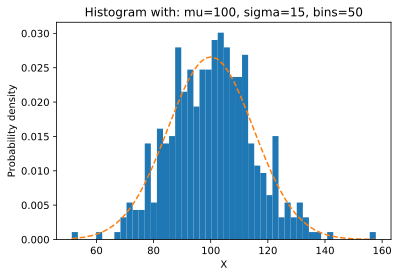

Output()

In [7]:
on_value_change(None)
out

#### 7. Run voila

Now you can run voila using the `flex` template and point it to the notebook file

<p class="code-header">Terminal</p>
```bash
$ voila --template=flex ipywidgets.ipynb
```

This will open a browser window and the result show look like this:

![Jupyter-flex voila widgets](/assets/img/voila-widgets.png)